# Exploratory Data Analysis (EDA) 探索性数据分析

## Library Package Loading 数据包加载

In [620]:
import pandas as pd
import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
# sets the backend of matplotlib to the 'inline' backend
%matplotlib inline


from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#removes the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm

In [621]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output

In [622]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import os

In [623]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Data Loading 数据加载

In [624]:
#bring in the six packs
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [625]:
# 常规步骤
#check the decoration
df_train.columns
df_train['SalePrice'].describe()
df_test.columns

##display the first five rows of the train dataset.
df_train.head(5)
##display the first five rows of the test dataset.
df_test.head(5)

print('START data processing', datetime.now(), )
print("Train set size:", df_train.shape)
print("Test set size:", df_test.shape)

START data processing 2021-10-03 16:33:27.012703
Train set size: (1460, 81)
Test set size: (1459, 80)


In [626]:
# Check for duplicates
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [627]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))


#Save the 'Id' column
#取出train矩阵（或者称之为“数据帧”dataframe）中title为'Id'的列，赋值给train_ID。所以train_ID是一维列向量了。test_ID类似。
#train_ID和test_ID根本就没有使用，完全可以删除。

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
#将train矩阵中的'Id'列删除（原地删除，故将inplace设为true），因为原始数据中的数据索引和预测模型的构建没有关系。
#test矩阵类似。

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Descriptive Data 数据描述

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

Variable - Variable name.

Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.

Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

Comments - Any general comments that occured to us.

## Univariate analysis 单变量分析 Analyzing 'SalePrice'

In [628]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

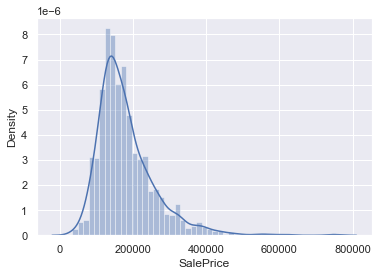

In [629]:
#histogram
sns.distplot(df_train['SalePrice']);

Deviate from the normal distribution.

Have appreciable positive skewness.

Show peakedness.

In [630]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price+1)'}>]], dtype=object)

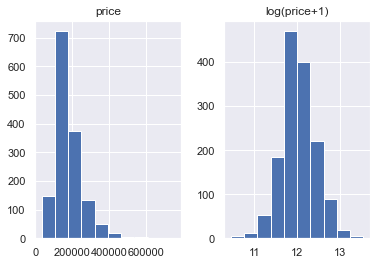

In [631]:
prices = pd.DataFrame({'price': df_train['SalePrice'], 'log(price+1)': np.log1p(df_train['SalePrice'])})
prices.hist()

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.Univariate analysis The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


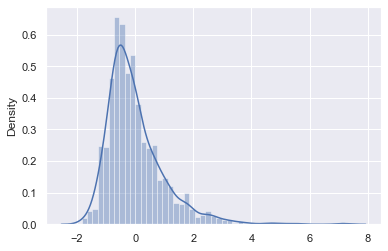

In [632]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

sns.distplot(saleprice_scaled);

Normality 正态性 - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity 同方差性 - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity 线性 - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors 误差相关性 - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Relationship with numerical variables (Bivariate analysis) 多变量分析

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


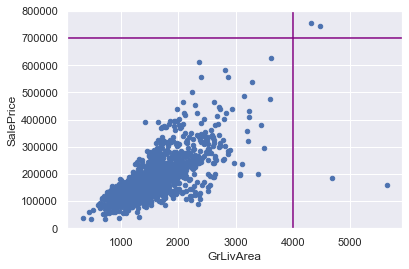

In [633]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.axvline(x=4000,color='purple')
plt.axhline(y=700000,color='purple')
# OR 
# fig, ax = plt.subplots()
# ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()


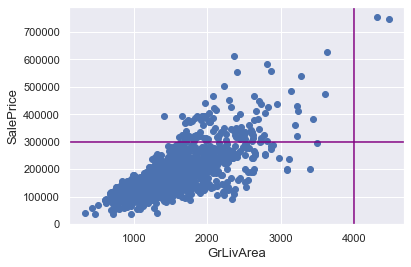

In [634]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
#Check the graphic again
#由于删去了部分行，故此时train矩阵中的index列并不连续。使用reset_index命令，在固定非index数据的顺序的前提下（inplace=True），重新对index编号（drop=True）。
#df_train.reset_index(drop=True, inplace=True)
# train = train[train.GrLivArea < 4000]
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.axvline(x=4000,color='purple')
plt.axhline(y=300000,color='purple')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


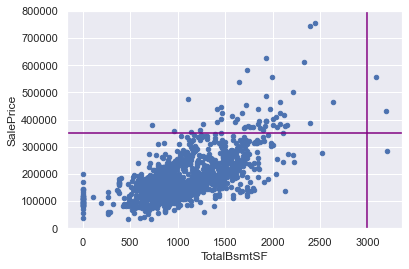

In [635]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.axvline(x=3000,color='purple')
plt.axhline(y=350000,color='purple')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


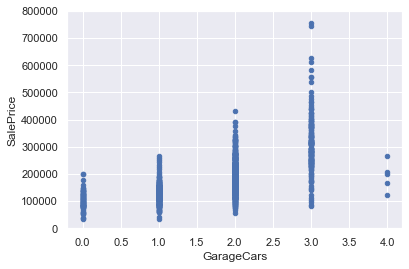

In [636]:
#scatter plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


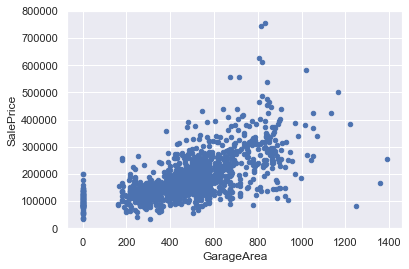

In [637]:
#scatter plot GarageArea/saleprice
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Relationship with categorical features

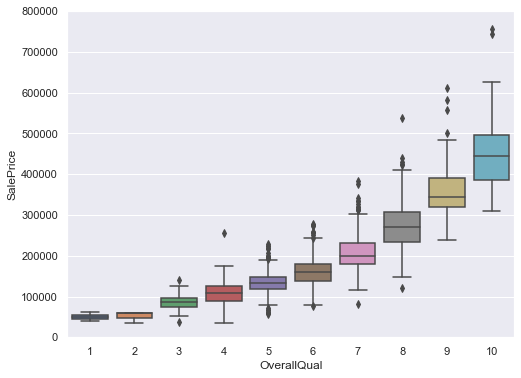

In [638]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) #pd.contact([,],axis=)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

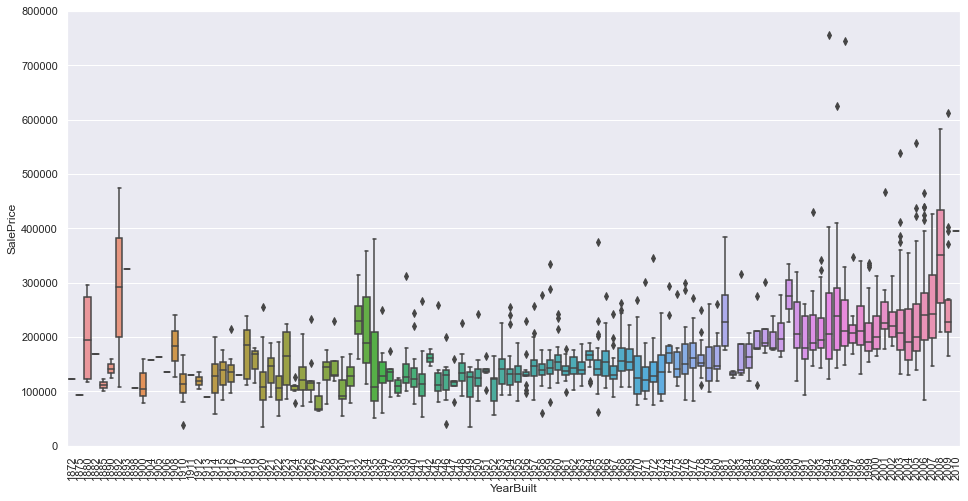

In [639]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## In summary for training data pattern

Stories aside, we can conclude that:

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

## Looking at Correlation

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':

Correlation matrix (heatmap style).

'SalePrice' correlation matrix (zoomed heatmap style).

Scatter plots between the most correlated variables (move like Jagger style).

## Correlation matrix (heatmap style)

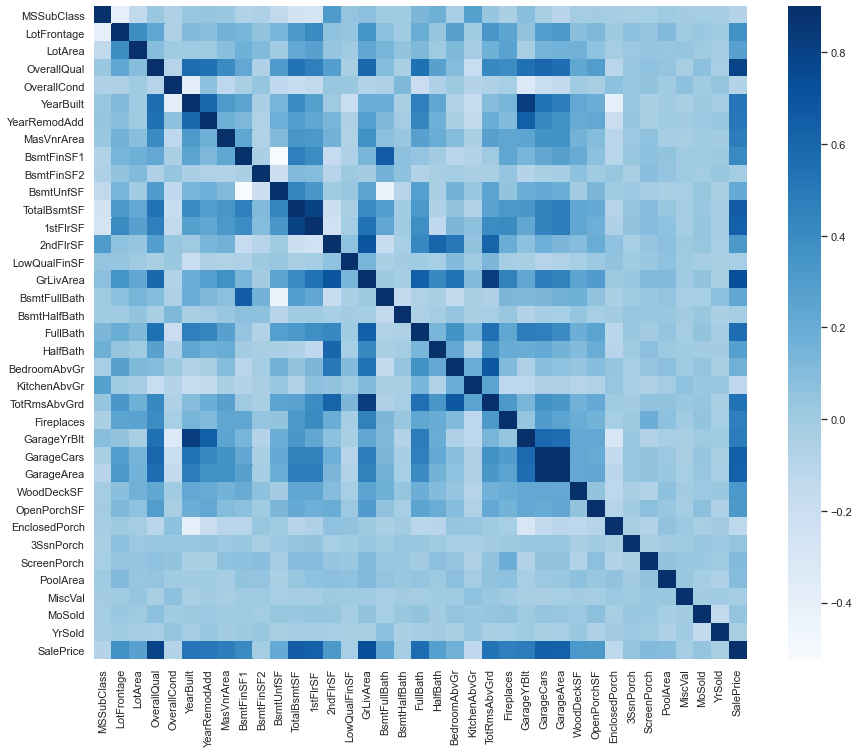

In [640]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.9, cmap="Blues",square=True);

## SalePrice' correlation matrix (zoomed heatmap style)

In [641]:
df_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.136
EnclosedPorch   -0.129
MSSubClass      -0.084
OverallCond     -0.078
YrSold          -0.029
LowQualFinSF    -0.026
MiscVal         -0.021
BsmtHalfBath    -0.017
BsmtFinSF2      -0.011
3SsnPorch        0.045
MoSold           0.046
PoolArea         0.099
ScreenPorch      0.111
BedroomAbvGr     0.168
BsmtUnfSF        0.214
BsmtFullBath     0.228
LotArea          0.268
HalfBath         0.285
2ndFlrSF         0.321
OpenPorchSF      0.321
WoodDeckSF       0.325
LotFrontage      0.371
BsmtFinSF1       0.409
Fireplaces       0.470
MasVnrArea       0.483
GarageYrBlt      0.487
YearRemodAdd     0.508
YearBuilt        0.524
TotRmsAbvGrd     0.538
FullBath         0.562
GarageArea       0.629
1stFlrSF         0.632
GarageCars       0.641
TotalBsmtSF      0.651
GrLivArea        0.735
OverallQual      0.796
SalePrice        1.000
Name: SalePrice, dtype: float64

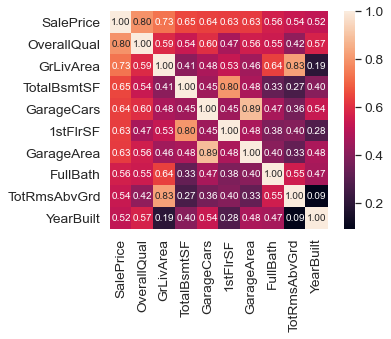

In [642]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 


'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

$$ 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'FullBath'?? Really?

$$$'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. 

'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

## Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

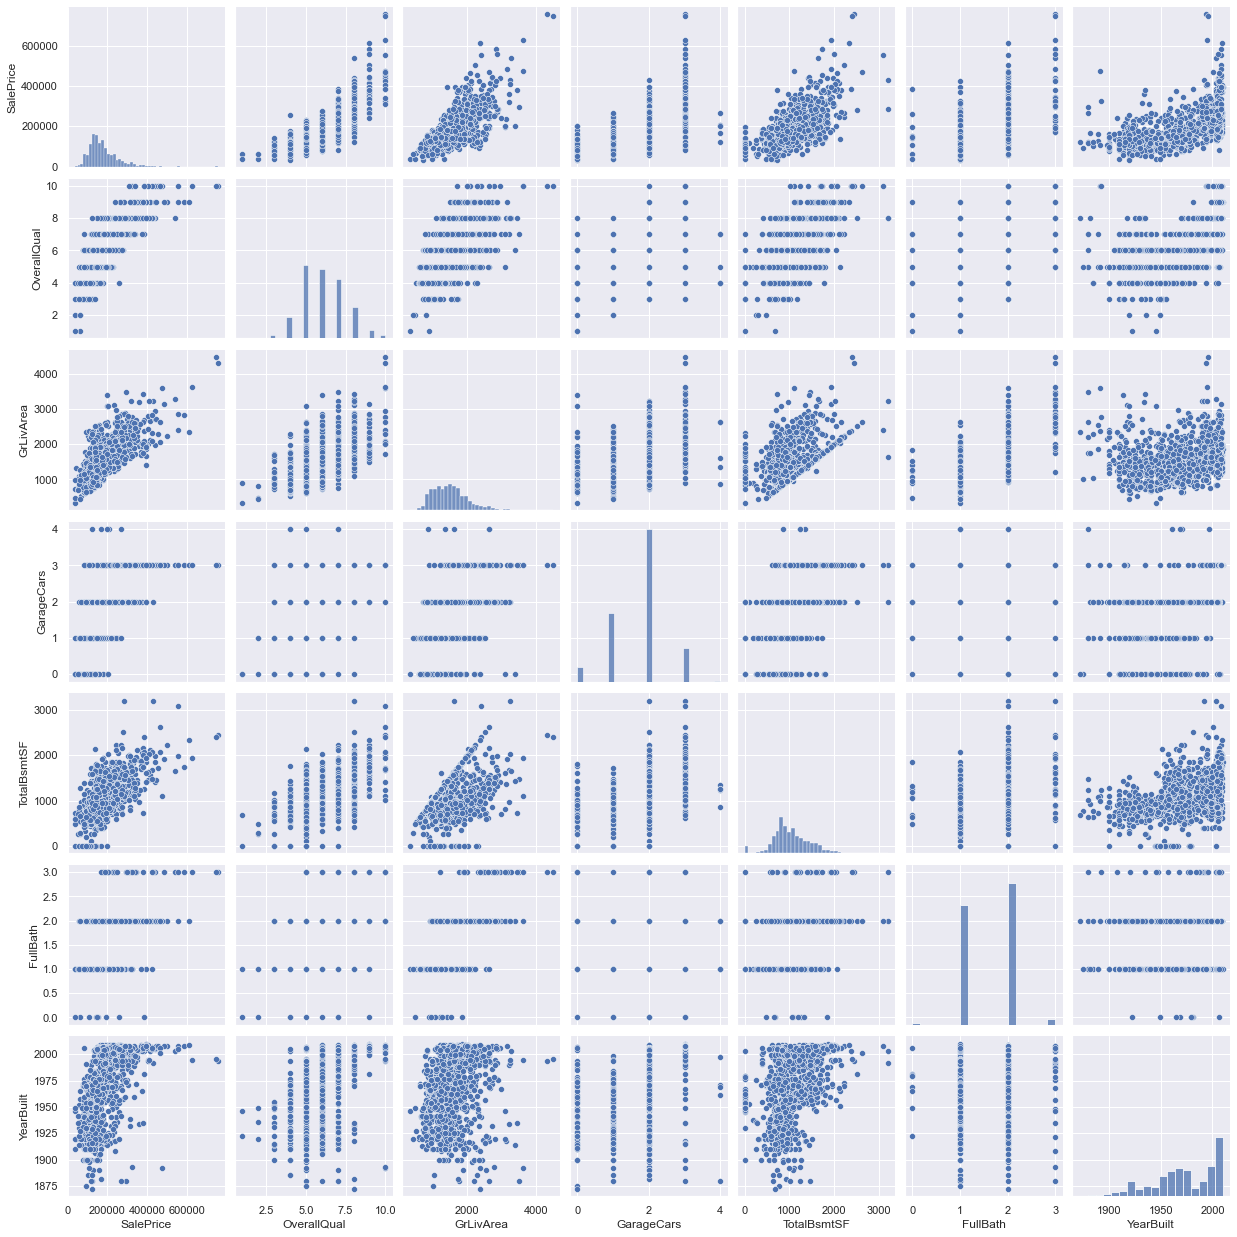

In [643]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

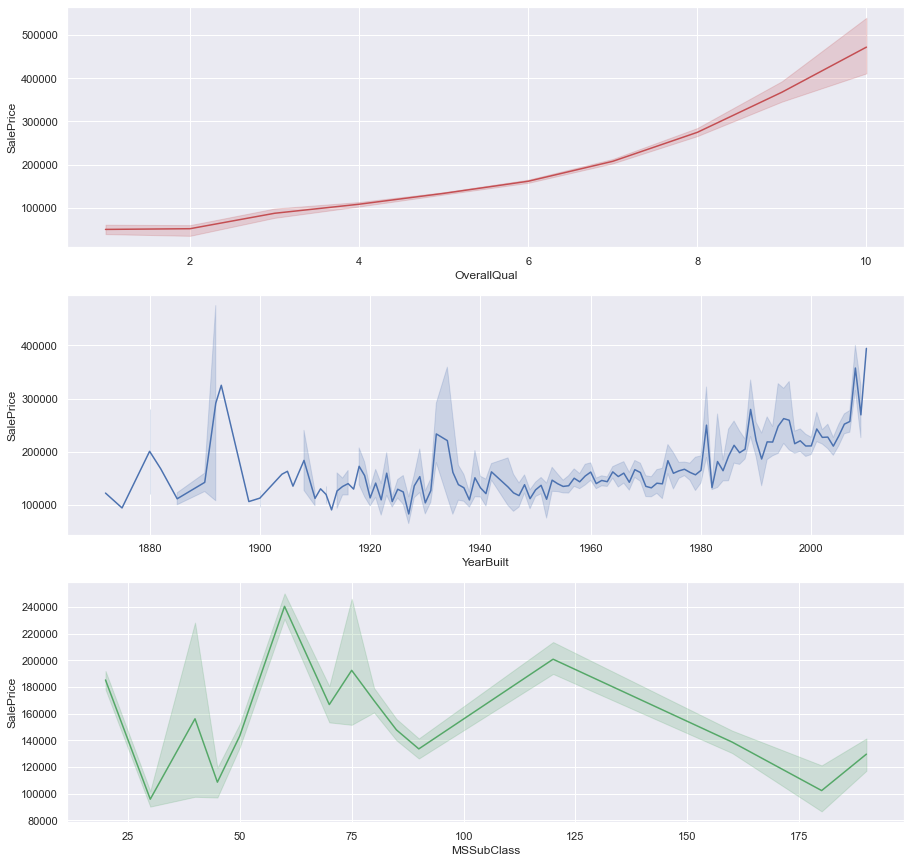

In [644]:
import seaborn as sn
fig,ax = plt.subplots(3,1,figsize=(15,15))
sn.lineplot(x=df_train['OverallQual'],y=df_train.SalePrice,ax=ax[0],color='r') #We visualize 3 features with different levels of correlation with SalePrice
sn.lineplot(x=df_train['YearBuilt'],y=df_train.SalePrice,ax=ax[1],color='b')
sn.lineplot(x=df_train['MSSubClass'],y=df_train.SalePrice,ax=ax[2],color='g')

<AxesSubplot:>

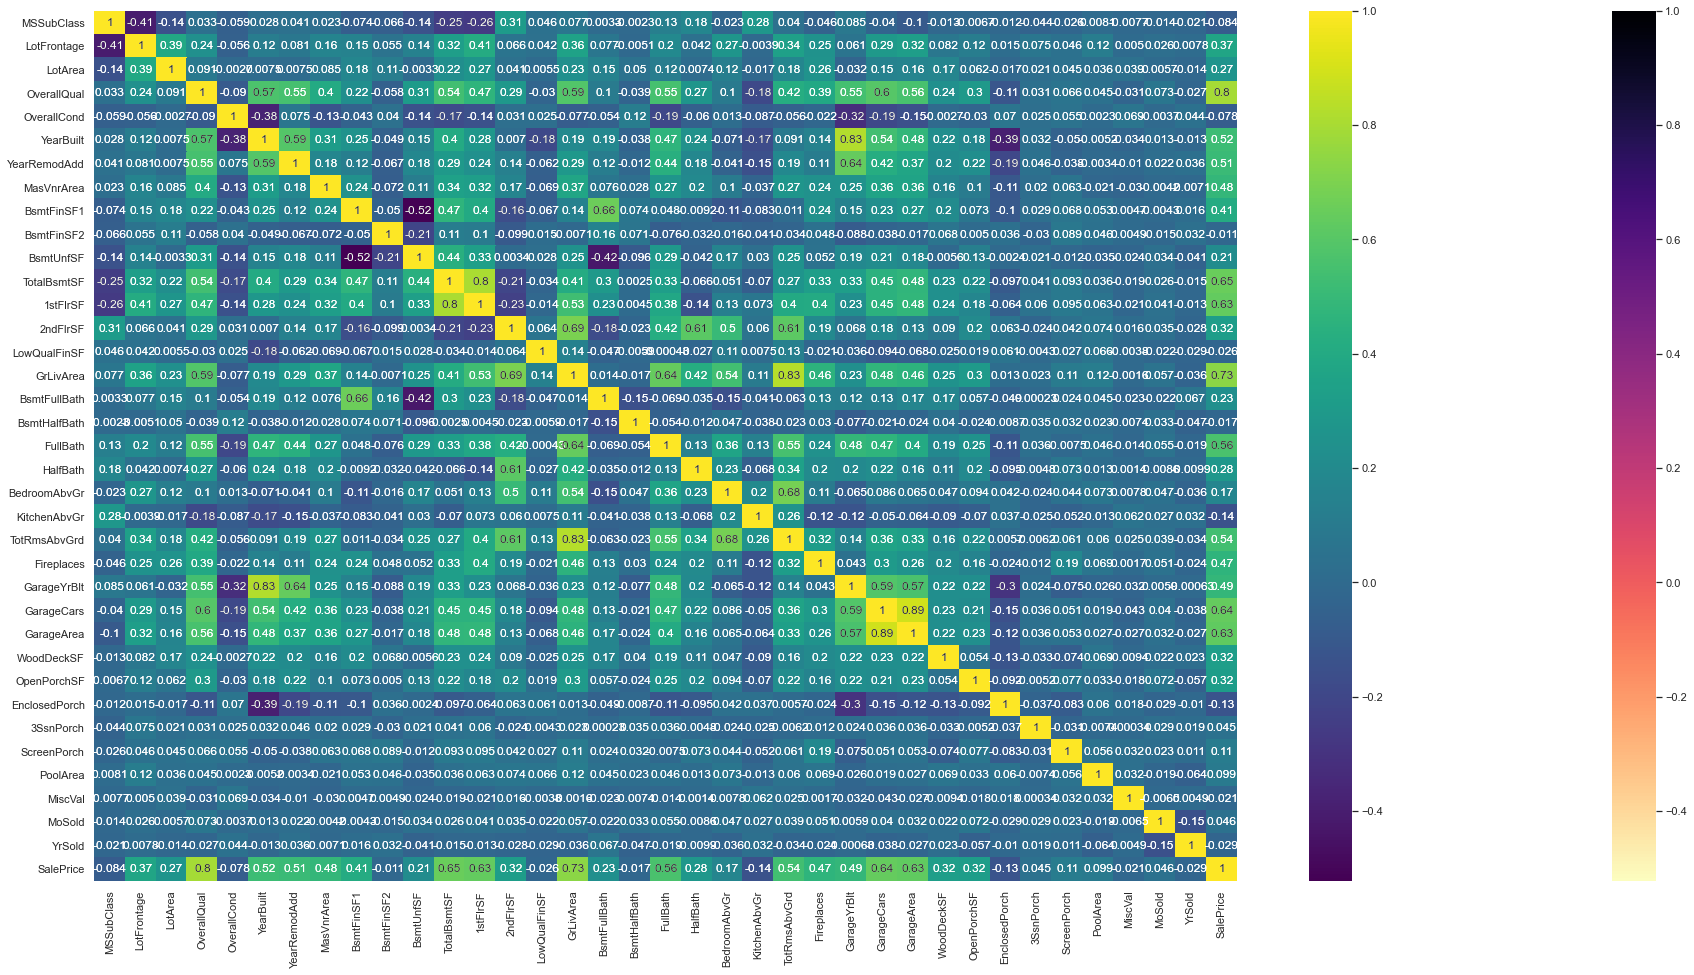

In [645]:
#We start visualizing a heat map for all numerical features
plt.figure(figsize=(32,16))
sn.heatmap(df_train.corr(),cmap='magma_r',annot=True) #Big correlation between YearBuilt and GarageYrBuilt -> delete GarageYrBuilt (difficult to impute null values)
sn.heatmap(df_train.corr(),cmap='viridis',annot=True) #Big correlation between YearBuilt and GarageYrBuilt -> delete GarageYrBuilt (difficult to impute null values)

Outliers are cases or data that have unique characteristics that look very different from other observations and appear in the form of extreme values for either a single variable or a combination 

# Section II. DATA PRE-PROCESSING 数据预处理

## Transformation of SalePrice 单变量转换


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

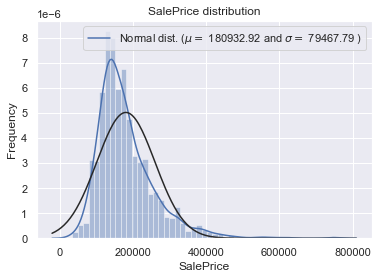

In [646]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);

#fig = plt.figure()
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. In case of positive skewness, log transformations usually works well

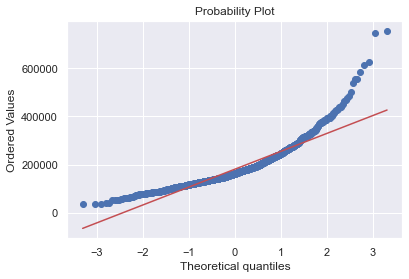

In [647]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



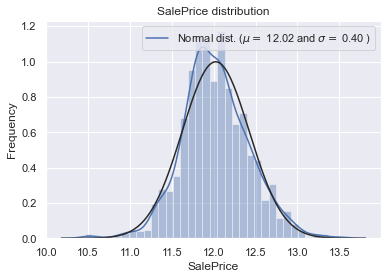

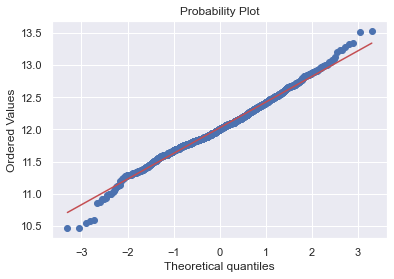

In [648]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
#all_data['SalePrice'][:ntrain] = np.log1p(all_data['SalePrice'][:ntrain])

#transformed histogram and normal probability plot
#Check the new distribution 
sns.distplot(df_train['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## 异常值检验Outliers Detection - 孤独森林法 

In [649]:
X = df_train[['SalePrice']]

In [650]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples='auto', 
                      random_state = 1, 
                      contamination= 0.02)
preds = clf.fit_predict(X) # 参数y默认为None
df_train['isoletionForest_outliers'] = preds
df_train['isoletionForest_outliers'] = df_train['isoletionForest_outliers'].astype(str)
df_train['isoletionForest_scores'] = clf.decision_function(X)

In [651]:
df_train = df_train[df_train['isoletionForest_outliers']!='-1']

In [652]:
#contact train datasets with test datasets
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train=df_train.pop('SalePrice').values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.head(10)
all_data.shape

(2887, 81)

In [653]:
all_data = all_data.drop(columns = ["isoletionForest_outliers","isoletionForest_scores"])

In [654]:
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("total data size is : {}".format(all_data.shape))

total data size is : (2887, 79)


## Imputing missing values 缺失值处理

How prevalent is the missing data?
Is missing data random or does it have a pattern?

In [655]:
print(pd.isnull(all_data).sum())
all_data.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass         0
MSZoning           4
LotFrontage      485
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


PoolQC          2879
MiscFeature     2784
Alley           2694
Fence           2322
FireplaceQu     1402
LotFrontage      485
GarageYrBlt      149
GarageFinish     149
GarageQual       149
GarageCond       149
dtype: int64

In [656]:
#dealing with missing data
# all_data = all_data.drop((missing_data[missing_data['Total'] > 0]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# all_data.isnull().sum().max() #just checking that there's no missing data missing...

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

percent_all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

total_all_data_na = all_data.isnull().sum().sort_values(ascending=False)

#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data = pd.concat([total_all_data_na, percent_all_data_na], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
PoolQC,2879,99.723
MiscFeature,2784,96.432
Alley,2694,93.315
Fence,2322,80.430
FireplaceQu,1402,48.563
LotFrontage,485,16.799
GarageYrBlt,149,5.161
GarageFinish,149,5.161
GarageQual,149,5.161
GarageCond,149,5.161


Text(0.5, 1.0, 'Percent missing data by feature')

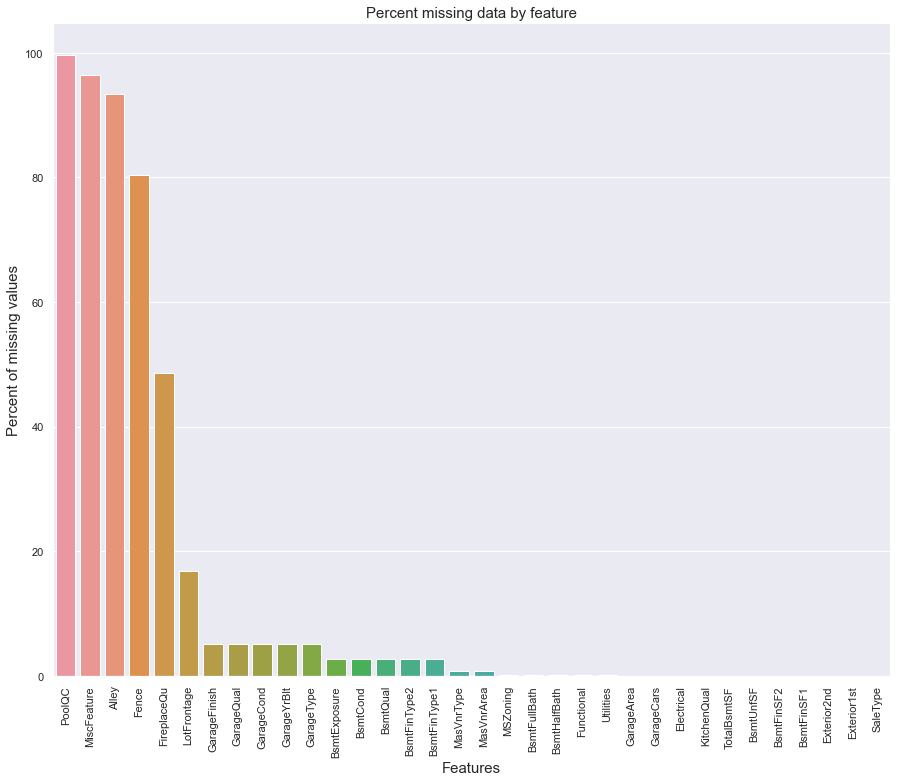

In [657]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent_all_data_na.index, y=percent_all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [658]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform( lambda x: x.fillna(x.median()))
#all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#对于列名为'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'的特征列，使用字符串'None'填充空值。
for col in ('GarageFinish','GarageQual','GarageCond','GarageType',):
    all_data[col] = all_data[col].fillna('None')

#对于列名为'GarageYrBlt', 'GarageArea', 'GarageCars'的特征列，使用0填充空值。
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#对于列名为'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'的特征列，使用字符串'None'填充空值。
for col in ('BsmtExposure','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) #Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['Utilities'] = all_data['Utilities'].fillna("AllPub") 

In [659]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### So it remains no missing value in training data.

In [660]:
#判断出矩阵中列为对象的列，将列名存入objects叔祖。对于all_data矩阵中的各个列对象，将其列中的空值填充为'None'
#objects = []
#for i in all_data.columns:
#    if all_data[i].dtype == object:
#        objects.append(i)
#all_data.update(all_data[objects].fillna('None'))

#对于整型和浮点型数据列，使用0填充其中的空值。
#numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numerics = []
#for i in all_data.columns:
#    if all_data[i].dtype in numeric_dtypes:
#        numerics.append(i)
#all_data.update(all_data[numerics].fillna(0))

In [661]:
######################数字型数据列偏度校正-【开始】#######################
#使用skew()方法，计算所有整型和浮点型数据列中，数据分布的偏度（skewness）。
#偏度是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。亦称偏态、偏态系数。 
#numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numerics2 = []
#for i in all_data.columns:
#    if all_data[i].dtype in numeric_dtypes:
#        numerics2.append(i)
#skew_features = all_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

#以0.5作为基准，统计偏度超过此数值的高偏度分布数据列，获取这些数据列的index。
#high_skew = skew_features[skew_features > 0.5]
#skew_index = high_skew.index

#对高偏度数据进行处理，将其转化为正态分布。
#Box和Cox提出的变换可以使线性回归模型满足线性性、独立性、方差齐次以及正态性的同时，又不丢失信息。
#for i in skew_index:
#    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))#这是boxcox1p的使用方法，参数的具体意义暂时不解释
######################数字型数据列偏度校正-【结束】#######################

In [662]:
######################特征删除和融合创建新特征-【开始】###################
#删除一些特征。df.drop（‘列名’, axis=1）代表将‘列名’对应的列标签（们）沿着水平的方向依次删掉。
#all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
#We start deleting the features with more than half of null value
all_data = all_data.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

#融合多个特征，生成新特征。
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF'])

#简化特征。对于某些分布单调（比如100个数据中有99个的数值是0.9，另1个是0.1）的数字型数据列，进行01取值处理。
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [663]:
#检查特征处理后，特征矩阵的维数，核查特征处理结果。
print("删除了3个特征，又融合创建了10个新特征，处理之后的特征矩阵维度为:",all_data.shape)

删除了3个特征，又融合创建了10个新特征，处理之后的特征矩阵维度为: (2887, 84)


## Transformation of GrLivArea 单变量转换 Comparison of GrLivArea in a normal distribution

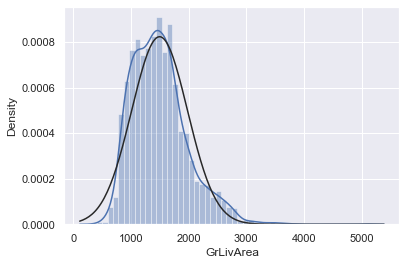

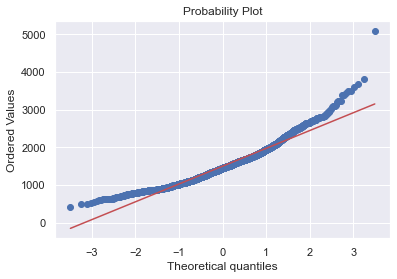

In [664]:
#histogram and normal probability plot
sns.distplot(all_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)

## Transforms GrLivArea into a normal distribution

In [665]:
#data transformation
all_data['GrLivArea'] = np.log1p(all_data['GrLivArea'])

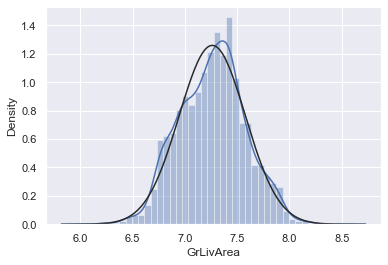

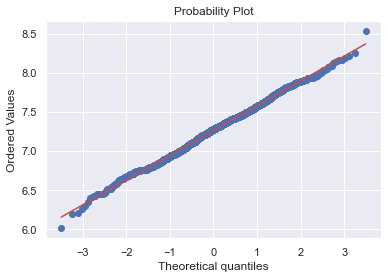

In [666]:
#transformed histogram and normal probability plot
sns.distplot(all_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)

## Transformation of TotalBsmtSF 单变量转换 Comparison of TotalBsmtSF in a normal distribution

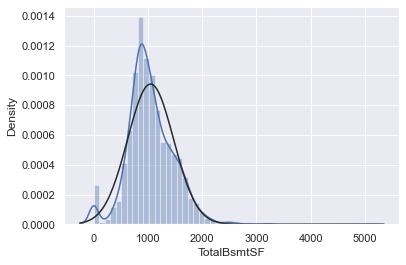

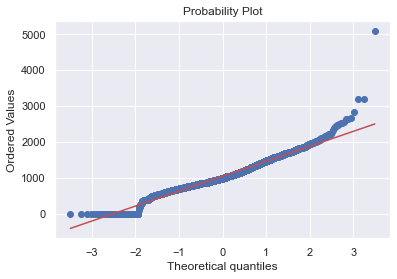

In [667]:
#histogram and normal probability plot
sns.distplot(all_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['TotalBsmtSF'], plot=plt)

## Transform totalBsmtSF to Binary categorical features

In [668]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

#add one more feature
all_data['HasBsmt'] = pd.Series(len(all_data['TotalBsmtSF']), index=all_data.index)
all_data['HasBsmt'] = 0 
all_data.loc[all_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [669]:
#transform data
all_data.loc[all_data['HasBsmt']==1,'TotalBsmtSF']= np.log1p(all_data['TotalBsmtSF'])

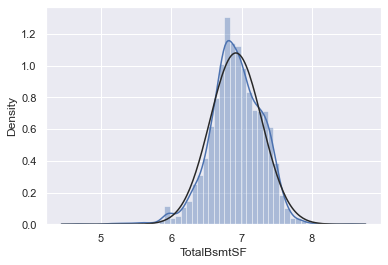

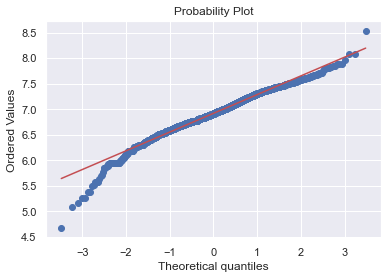

In [670]:
#histogram and normal probability plot
sns.distplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## 特征构造Transforming some numerical variables that are really categorical 特征类型转换

In [671]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [672]:
numeric_cols = all_data.columns[all_data.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrBltAndRemod', 'TotalSF',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'haspool',
       'has2ndfloor', 'hasgarage', 'hasfireplace', 'HasBsmt'],
      dtype='object')

##  Label Encoding some categorical variables that may contain information in their ordering set 特征值统一

In [673]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC' , 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#'PoolQC','Street'',Fence', 'Alley'
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2887, 85)


## Adding one more important feature 添加特征

In [674]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2887, 85)


In [675]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,22.176
PoolArea,18.611
haspool,16.108
LotArea,13.324
LowQualFinSF,12.021
3SsnPorch,11.312
LandSlope,5.035
KitchenAbvGr,4.293
BsmtFinSF2,4.138
EnclosedPorch,4.018


In [676]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 64 skewed numerical features to Box Cox transform


# III. FEATURES ENGINEERING 特征工程

## Final Datasets

In [677]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasfireplace,HasBsmt
0,2.886,RL,5.831,19.212,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.472,13.711,14.782,1.687,5.715,0.000,0.730,0.730,0.000,0.730
1,2.056,RL,6.221,19.712,Pave,1.541,Lvl,AllPub,FR2,0.000,...,16.425,12.809,14.540,1.378,9.010,0.000,0.000,0.730,0.730,0.730
2,2.886,RL,5.915,20.347,Pave,0.000,Lvl,AllPub,Inside,0.000,...,16.469,13.844,14.585,1.687,5.053,0.000,0.730,0.730,0.730,0.730
3,3.011,RL,5.685,19.692,Pave,0.000,Lvl,AllPub,Corner,0.000,...,16.365,13.723,14.077,1.194,9.080,0.000,0.730,0.730,0.730,0.730
4,2.886,RL,6.315,21.325,Pave,0.000,Lvl,AllPub,FR2,0.000,...,16.466,14.490,15.323,1.687,8.832,0.000,0.730,0.730,0.730,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,1.194,RM,3.933,14.081,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,12.391,12.375,0.982,0.000,0.000,0.730,0.000,0.000,0.730
2883,1.194,RM,3.933,14.013,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,12.391,12.977,0.982,4.138,0.000,0.730,0.730,0.000,0.730
2884,2.056,RL,7.620,22.782,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.428,12.720,14.824,1.194,10.137,0.000,0.000,0.730,0.730,0.730
2885,3.341,RL,5.744,20.047,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.453,12.059,12.895,0.982,6.881,0.000,0.000,0.000,0.000,0.730


In [678]:
df_train=all_data[:ntrain]
df_test=all_data[ntrain:]

In [679]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasfireplace,HasBsmt
0,2.886,RL,5.831,19.212,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.472,13.711,14.782,1.687,5.715,0.000,0.730,0.730,0.000,0.730
1,2.056,RL,6.221,19.712,Pave,1.541,Lvl,AllPub,FR2,0.000,...,16.425,12.809,14.540,1.378,9.010,0.000,0.000,0.730,0.730,0.730
2,2.886,RL,5.915,20.347,Pave,0.000,Lvl,AllPub,Inside,0.000,...,16.469,13.844,14.585,1.687,5.053,0.000,0.730,0.730,0.730,0.730
3,3.011,RL,5.685,19.692,Pave,0.000,Lvl,AllPub,Corner,0.000,...,16.365,13.723,14.077,1.194,9.080,0.000,0.730,0.730,0.730,0.730
4,2.886,RL,6.315,21.325,Pave,0.000,Lvl,AllPub,FR2,0.000,...,16.466,14.490,15.323,1.687,8.832,0.000,0.730,0.730,0.730,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2.886,RL,5.744,18.961,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.466,13.597,13.585,1.378,4.970,0.000,0.730,0.730,0.730,0.730
1424,2.056,RL,6.338,20.995,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.437,14.306,15.518,1.541,9.385,0.000,0.000,0.730,0.730,0.730
1425,3.011,RL,5.860,19.476,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.420,14.689,15.038,1.194,5.685,0.000,0.730,0.730,0.730,0.730
1426,2.056,RL,5.915,19.760,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.419,12.356,14.419,1.194,10.158,0.000,0.000,0.730,0.000,0.730


In [680]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasfireplace,HasBsmt
1428,2.056,RH,6.221,20.479,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.398,11.840,13.319,0.730,8.694,0.000,0.000,0.730,0.000,0.730
1429,2.056,RL,6.245,21.327,Pave,0.000,Lvl,AllPub,Corner,0.000,...,16.393,12.960,14.557,0.982,9.888,0.000,0.000,0.730,0.000,0.730
1430,2.886,RL,6.073,21.197,Pave,0.000,Lvl,AllPub,Inside,0.000,...,16.462,13.564,14.787,1.378,8.567,0.000,0.730,0.730,0.730,0.730
1431,2.886,RL,6.173,19.865,Pave,0.000,Lvl,AllPub,Inside,0.000,...,16.463,13.517,14.492,1.378,9.691,0.000,0.730,0.730,0.730,0.730
1432,0.000,RL,5.094,17.257,Pave,0.000,HLS,AllPub,Inside,0.000,...,16.453,12.850,13.388,1.194,8.376,0.000,0.000,0.730,0.000,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,1.194,RM,3.933,14.081,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,12.391,12.375,0.982,0.000,0.000,0.730,0.000,0.000,0.730
2883,1.194,RM,3.933,14.013,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.414,12.391,12.977,0.982,4.138,0.000,0.730,0.730,0.000,0.730
2884,2.056,RL,7.620,22.782,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.428,12.720,14.824,1.194,10.137,0.000,0.000,0.730,0.730,0.730
2885,3.341,RL,5.744,20.047,Pave,1.541,Lvl,AllPub,Inside,0.000,...,16.453,12.059,12.895,0.982,6.881,0.000,0.000,0.000,0.000,0.730


In [685]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        numerics.append(i)
numerics
df_train = df_train[numerics]
df_train

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df_train):
    vif = pd.DataFrame()
    vif["index"] = df_train.columns
    vif["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]    
    return(vif)
  
vif = calculate_vif(df_train)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['index'][:1]
    df_train.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(df_train)
    
vif.sort_values(by = "VIF",ascending=False)

,index,VIF
7,BsmtUnfSF,9.694
22,MoSold,8.703
5,BsmtFinSF1,6.549
4,BsmtFinType1,6.387
3,BsmtExposure,6.334
14,GarageFinish,4.640
23,YrSold,3.482
10,BsmtFullBath,3.308
24,has2ndfloor,3.143
0,LotShape,3.119


In [686]:
all_data = all_data.drop(columns = ["BsmtUnfSF"])

In [687]:
df_train=all_data[:ntrain]
df_test=all_data[ntrain:]

## Getting dummy variables

In [688]:
all_data_dummy = pd.get_dummies(all_data)
df_train_dummy = all_data_dummy[:ntrain]
df_test_dummy = all_data_dummy[ntrain:]
# Convert to numpy array
# df_train_dummy = np.array(df_train_dummy)
#y_train=df_train.pop('SalePrice').values
#y_train = np.log1p(df_train.pop('SalePrice')) #df.pop()
all_data_dummy.shape

(2887, 222)

In [689]:
y  = np.array(y_train)
y
len(y)

1428

In [690]:
df_train_dummy_list = list(df_train_dummy.columns)
len(df_train_dummy_list)

222

In [691]:
train=df_train_dummy
test=df_test_dummy

In [692]:
train

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.886,5.831,19.212,1.541,0.000,2.440,1.820,14.188,14.188,8.059,...,0,0,0,1,0,0,0,0,1,0
1,2.056,6.221,19.712,1.541,0.000,2.260,2.440,14.145,14.145,0.000,...,0,0,0,1,0,0,0,0,1,0
2,2.886,5.915,20.347,0.000,0.000,2.440,1.820,14.184,14.186,7.647,...,0,0,0,1,0,0,0,0,1,0
3,3.011,5.685,19.692,0.000,0.000,2.440,1.820,14.048,14.136,0.000,...,0,0,0,1,1,0,0,0,0,0
4,2.886,6.315,21.325,0.000,0.000,2.603,1.820,14.183,14.183,9.392,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2.886,5.744,18.961,1.541,0.000,2.260,1.820,14.181,14.183,0.000,...,0,0,0,1,0,0,0,0,1,0
1424,2.056,6.338,20.995,1.541,0.000,2.260,2.056,14.148,14.164,7.004,...,0,0,0,1,0,0,0,0,1,0
1425,3.011,5.860,19.476,1.541,0.000,2.440,2.603,14.089,14.192,0.000,...,0,0,0,1,0,0,0,0,1,0
1426,2.056,5.915,19.760,1.541,0.000,2.056,2.056,14.104,14.177,0.000,...,0,0,0,1,0,0,0,0,1,0


In [693]:
X = train

In [695]:
test

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1428,2.056,6.221,20.479,1.541,0.000,2.056,2.056,14.121,14.121,0.000,...,0,0,0,1,0,0,0,0,1,0
1429,2.056,6.245,21.327,0.000,0.000,2.260,2.056,14.117,14.117,6.808,...,0,0,0,1,0,0,0,0,1,0
1430,2.886,6.073,21.197,0.000,0.000,2.056,1.820,14.178,14.180,0.000,...,0,0,0,1,0,0,0,0,1,0
1431,2.886,6.173,19.865,0.000,0.000,2.260,2.056,14.180,14.180,3.859,...,0,0,0,1,0,0,0,0,1,0
1432,0.000,5.094,17.257,0.000,0.000,2.603,1.820,14.170,14.170,0.000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,1.194,3.933,14.081,1.541,0.000,1.820,2.260,14.136,14.136,0.000,...,0,0,0,1,0,0,0,0,1,0
2883,1.194,3.933,14.013,1.541,0.000,1.820,1.820,14.136,14.136,0.000,...,0,0,0,1,1,0,0,0,0,0
2884,2.056,7.620,22.782,1.541,0.000,2.056,2.260,14.120,14.177,0.000,...,0,0,0,1,1,0,0,0,0,0
2885,3.341,5.744,20.047,1.541,0.000,2.056,1.820,14.170,14.170,0.000,...,0,0,0,1,0,0,0,0,1,0


In [696]:
df_train_list = list(train.columns)
len(df_train_list)
df_train_list.index('OverallQual')

5

In [697]:
df_test_list = list(test.columns)
len(df_test_list)

222

# IV. DATA MODELLING 数据建模

In [698]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Establish Baseline

Establish baseline for measure model. If te model cannot improve upon the baseline, then it will be a failure and should try a different model or admit that machine learning is not right for problem.

In [699]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df_train, test_df_train, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [700]:
print('Training df_train Shape:', train_df_train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df_train Shape:', test_df_train.shape)
print('Testing Labels Shape:', test_labels.shape)

Training df_train Shape: (1071, 222)
Training Labels Shape: (1071,)
Testing df_train Shape: (357, 222)
Testing Labels Shape: (357,)


In [701]:
x_train = train_df_train
y_train = train_labels
x_test = test_df_train
y_test = test_labels

In [702]:
# The baseline predictions are the historical averages
#baseline_preds = test_df_train['OverallQual']
baseline_preds = np.array(test_df_train.iloc[:, [df_train_list.index('OverallQual')]])

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('OverallQual baseline error: ', round(np.mean(baseline_errors), 2))

OverallQual baseline error:  9.78


In [703]:
# The baseline predictions are the historical averages
baseline_preds = test_df_train['GrLivArea']

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('GrLivArea baseline error: ', round(np.mean(baseline_errors), 2))

GrLivArea baseline error:  9.57


In [704]:
# The baseline predictions are the historical averages
baseline_preds = test_df_train['GarageArea']
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('GarageArea baseline error: ', round(np.mean(baseline_errors), 2))

GarageArea baseline error:  2.33


In [705]:
# The baseline predictions are the historical averages
baseline_preds = test_df_train['TotalBsmtSF']
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('GarageArea baseline error: ', round(np.mean(baseline_errors), 2))


GarageArea baseline error:  9.67


In [706]:
# The baseline predictions are the historical averages
baseline_preds = test_df_train['FullBath']
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('GarageArea baseline error: ', round(np.mean(baseline_errors), 2))

GarageArea baseline error:  11.05


In [707]:
# The baseline predictions are the historical averages
baseline_preds = test_df_train['YearBuilt']
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('GarageArea baseline error: ', round(np.mean(baseline_errors), 2))

GarageArea baseline error:  2.09


## Cross Validation Function 交叉验证

In [708]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Define error measure for official scoring : RMSE
#from sklearn.metrics import mean_squared_error, make_scorer
#scorer = make_scorer(mean_squared_error, greater_is_better = False)

#def rmse_cv_train(model):
#    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
#    return(rmse)

#def rmse_cv_test(model):
#    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
#    return(rmse)

## Linear Regression 线性回归模型

In [709]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Linear Regression
lr = LinearRegression()
lr.fit(train_df_train, train_labels)
score = rmsle_cv(lr)
print("\nLinearRegression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LinearRegression score: 43893.0189 (48431.4338)



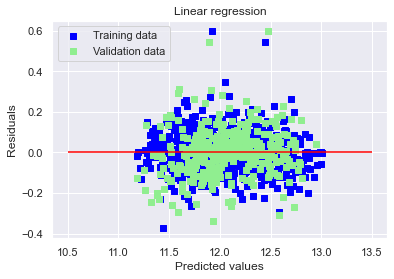

In [710]:
y_train_pred = lr.predict(train_df_train)
y_test_pred = lr.predict(test_df_train)
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_labels, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

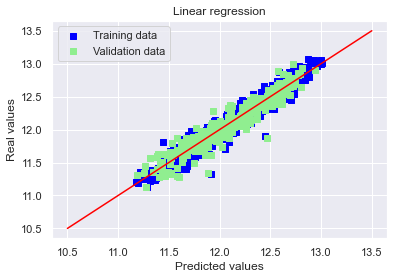

In [711]:
# Plot predictions
plt.scatter(y_train_pred,train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_labels, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Lasso Regression模型

In [712]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1018 (0.0070)



## Elastic Net Regression模型

In [713]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1017 (0.0070)



## Kernel Ridge Regression模型

In [714]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1024 (0.0076)



## Gradient Boosting Regression模型

With huber loss that makes it robust to outliers

In [715]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1014 (0.0060)



### XGBoost模型

In [716]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
cvxgb = cross_val_score(model_xgb, train.values, y, cv = 5)
print(cvxgb.mean())

model_xgb.fit(train.values, y)
xgb_train_pred = model_xgb.predict(train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))
print(rmsle(y, xgb_train_pred))

#from xgboost import XGBRegressor

#params = [1,2,3,4,5,6]
#test_scores = []
#for param in params:
#    clf = XGBRegressor(max_depth=param)
#    test_score = np.sqrt(-cross_val_score(clf, train.values, y_train, cv=10, scoring='neg_mean_squared_error'))
#   test_scores.append(np.mean(test_score))

#plt.plot(params, test_scores)
#plt.title("max_depth vs CV Error")

[16:45:21] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:45:23] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:45:25] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:45:28] WARNING: ..

## LightGBM模型

In [717]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

## Random Forest 随机森林模型

In [718]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, criterion='mse', min_samples_split=2, 
                      min_samples_leaf=1, random_state = 42)

In [719]:
# Train the model on training data
rf.fit(train_df_train, train_labels);
# Use the forest's predict method on the test data
#predictions = rf.predict(test_df_train)
# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'Value')
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_labels)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

# Print Score
score = rmsle_cv(rf)
print("Random Forest score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Random Forest score: 0.1250 (0.0055)



In [720]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_train_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.53
Variable: Total_sqr_footage    Importance: 0.2
Variable: TotalSF              Importance: 0.03
Variable: TotalBsmtSF          Importance: 0.02
Variable: GarageArea           Importance: 0.02
Variable: YrBltAndRemod        Importance: 0.02
Variable: LotFrontage          Importance: 0.01
Variable: LotArea              Importance: 0.01
Variable: OverallCond          Importance: 0.01
Variable: YearBuilt            Importance: 0.01
Variable: YearRemodAdd         Importance: 0.01
Variable: BsmtQual             Importance: 0.01
Variable: 1stFlrSF             Importance: 0.01
Variable: GrLivArea            Importance: 0.01
Variable: GarageYrBlt          Importance: 0.01
Variable: GarageCars           Importance: 0.01
Variable: Total_Bathrooms      Importance: 0.01
Variable: Total_porch_sf       Importance: 0.01
Variable: GarageType_Detchd    Importance: 0.01
Variable: MSSubClass           Importance: 0.0
Variable: LotShape             Importance:

In [723]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 50, random_state=88)

# Extract the two most important features
important_indices = ['OverallQual','Total_sqr_footage','GarageArea','TotalBsmtSF','LotArea','OverallCond','YearBuilt','YearRemodAdd','BsmtQual',
                    'CentralAir','1stFlrSF','GrLivArea','GarageYrBlt','GarageCars','YrBltAndRemod','TotalSF','Total_porch_sf']
#'BsmtUnfSF'
train_important = train_df_train.loc[:, important_indices]
test_important = test_df_train.loc[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('OverallQual Mean Absolute Error:', round(np.mean(errors), 1), 'Rates')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 1), '%.')

OverallQual Mean Absolute Error: 0.1 Rates
Accuracy: 99.2 %.


In [724]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

In [725]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(train_df_train)
train_df_train = scaler.transform(train_df_train)
test_df_train = scaler.transform( test_df_train)

In [726]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

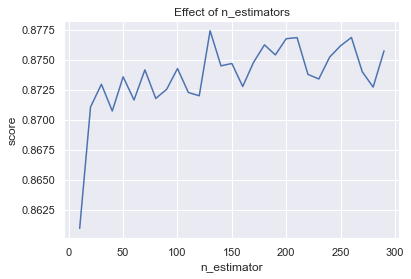

In [727]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(train_df_train, train_labels)
    scores.append(model.score(test_df_train, test_labels))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## 集成方式 Bagging

In [728]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

0.10328441274350733
[7.54312006]


Text(0, 0.5, 'CV Error')

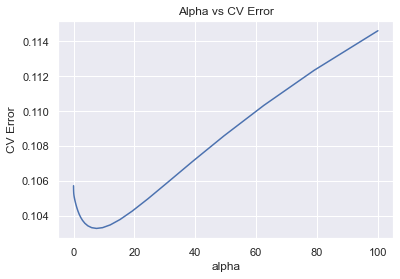

In [729]:
alphas = np.logspace(-3, 2, 50)
test_scores=[]
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, train.values, y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores)

print(min(test_scores))
alphasvalue = alphas[test_scores==min(test_scores)]
print(alphasvalue)

plt.title("Alpha vs CV Error")
plt.xlabel("alpha")
plt.ylabel("CV Error")

In [730]:
ridge = Ridge (alpha=alphasvalue)

Text(0.5, 1.0, 'n_estimator vs CV Error')

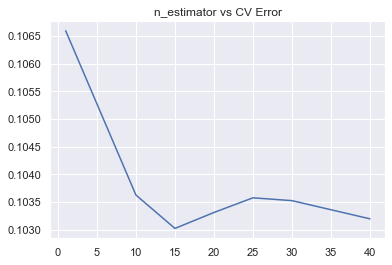

In [731]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, train.values, y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error")

## 集成方式 Boosting

Text(0.5, 1.0, 'n_estimator vs CV Error')

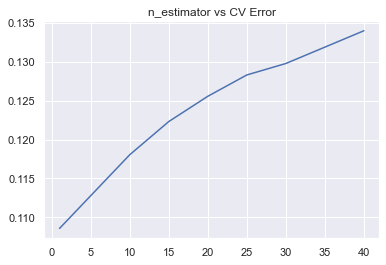

In [732]:
from sklearn.ensemble import AdaBoostRegressor

params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, train.values, y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error")

## 最终选择集成方式 Ensembling StackedRegressor, XGBoost and LightGBM 三模型集成

In [733]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## （1）Stack模型

In [734]:
### Averaged base models class 平均法

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

### Stacking averaged Models Class 叠加法

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

 Averaged base models score: 0.0973 (0.0071)

Stacking Averaged models score: 0.0964 (0.0069)


In [735]:
stacked_averaged_models.fit(train.values, y)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y, stacked_train_pred))

0.06350773169427762


## （2）XGBoost模型

In [737]:
model_xgb.fit(train, y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y, xgb_train_pred))

[17:07:39] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.07621765985895525


## （3）LightGBM模型

In [738]:
model_lgb.fit(train, y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.06427538845849137


## （4) GBM模型

In [739]:
GBoost.fit(train.values, y)
GBoost_train_pred = GBoost.predict(train.values)
GBoost_pred = np.expm1(GBoost.predict(test.values))
print(rmsle(y, GBoost_train_pred))

0.036318138831536284


### ￥￥￥Ensemble prediction 集成预测

In [740]:
z = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

MinValue=1

for i in z:
    for j in z:
        if i+j <1:
            if MinValue>rmsle(y,stacked_train_pred*i +
               xgb_train_pred*j + lgb_train_pred*(1-i-j)):
                MinValue=rmsle(y,stacked_train_pred*i +
               xgb_train_pred*j + lgb_train_pred*(1-i-j))
                k1=i
                k2=j
                
k3=1-k1-k2

print(MinValue)

print(k1,k2,k3)
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y,stacked_train_pred*0.5 +
               xgb_train_pred*0.1 + lgb_train_pred*0.4 ))

0.06300636389918308
0.5 0.1 0.4
RMSLE score on train data:
0.06300636389918308


In [741]:
ensemble = stacked_pred*0.5 + xgb_pred*0.1 + lgb_pred*0.4
ensemble

array([122889.21449265, 161769.10679071, 184564.91928424, ...,
       164435.54333992, 117787.0654837 , 217471.67517674])

### Submission 完成递交

In [742]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)